82959.0 19036.0


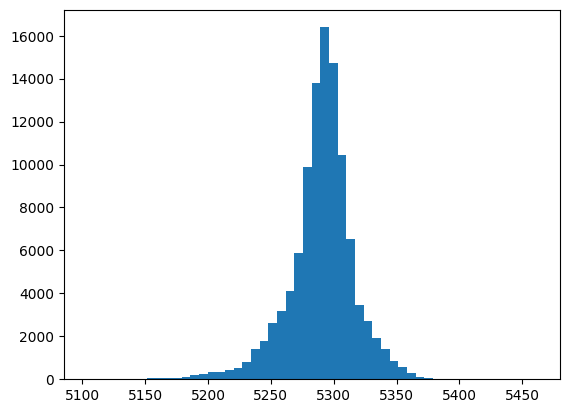

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from scipy.stats import norm
from scipy.integrate import quad

#file = input("File: ")
raw_data = np.loadtxt("900mm2_241Am/Vbias_900mm2_241Am_06-11-24_V10.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []


for i in range(len(data)):
    if data[i] > 5100 and data[i] < 5500: signal.append(data[i])

N=sum(raw_data)

def model(x, N1, N2, mu1, sigma1, mu2, sigma2):
	return N1*norm.cdf(x, loc = mu1, scale = sigma1) + N2*norm.cdf(x, loc = mu2, scale = sigma2)

nbins = int(np.ceil(1 + np.log(len(signal)/np.log(2)))) * 4

bin_content, bin_edges, _ = plt.hist(signal, bins = nbins)


N1_ext = 0
N2_ext = 0

for i in range(5275, 5350): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]

for i in range(5225, 5275): #picco2
    N2_ext = N2_ext + raw_data[i]

print(N1_ext, N2_ext)

In [2]:
N_events = sum(bin_content)

costf = ExtendedBinnedNLL(bin_content, bin_edges, model)

my_minuit = Minuit(costf, N1 = N1_ext, N2 = N2_ext, mu1 = 5300, sigma1 = 5, mu2= 5250, sigma2= 5)
my_minuit.limits["mu1"] = [5275,5300]
my_minuit.limits["mu2"] = [5230,5275]
my_minuit.migrad()

ch1 = my_minuit.values['mu1']
err_ch1 = my_minuit.errors['mu1']
fwhm1 = 2.355 * my_minuit.values['sigma1']
err_fwhm1 = 2.355 * my_minuit.errors['sigma1']
frac1 = fwhm1 / ch1
err_frac1 = frac1 * (err_ch1/ch1 + err_fwhm1/fwhm1)

ch2 = my_minuit.values['mu2']
err_ch2 = my_minuit.errors['mu2']
fwhm2 = 2.355 * my_minuit.values['sigma2']
err_fwhm2 = 2.355 * my_minuit.errors['sigma2']
frac2 = fwhm2 / ch2
err_frac2 = frac2 * (err_ch2/ch2 + err_fwhm2/fwhm2)

print("chi2: " + str(my_minuit.fval/my_minuit.ndof))


print("\n \n channel1: " + str(ch1)  + " +/- " + str(err_ch1))
print("\n fwhm1: " + str(fwhm1) + " +/- " + str(err_fwhm1))
print("\n fwhm1/channel1 (1e-3): " + str(frac1 * 10**3) + " +/- " + str(err_frac1 * 10**3))

'''print("\n \n channel2: " + str(ch2)  + " +/- " + str(err_ch2))
print("\n fwhm2: " + str(fwhm2) + " +/- " + str(err_fwhm2))
print("\n fwhm2/channel2 (1e-3): " + str(frac2 * 10**3) + " +/- " + str(err_frac2 * 10**3))

print("\n \n channel3: " + str(ch3)  + " +/- " + str(err_ch3))
print("\n fwhm3: " + str(fwhm3) + " +/- " + str(err_fwhm3))
print("\n fwhm3/channel3 (1e-3): " + str(frac3 * 10**3) + " +/- " + str(err_frac3 * 10**3))'''

display(my_minuit)

print()

chi2: 76.56442579920737

 
 channel1: 5294.245120413157 +/- 0.0793789963963718

 fwhm1: 37.176375280246326 +/- 0.251013630988317

 fwhm1/channel1 (1e-3): 7.022035140931504 +/- 0.04751782876853875


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3522 (χ²/ndof = 76.6)      │              Nfcn = 749              │
│ EDM = 2.92e-05 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  75.2e3   │   0.5e3   │            │            │         │         │       │
│ 1 │ N2     │  30.3e3   │   0.4e3   │            │            │         │         │       │
│ 2 │ mu1    │ 5.29425e3 │ 0.00008e3 │            │            │  5275   │  5300   │       │
│ 3 │ sigma1 │   15.79   │   0.11    │            │            │         │         │       │
│ 4 │ mu2    │5.275000e3 │0.000007e3 │            │            │  5230   │  5275   │       │
│ 5 │ sigma2 │   41.57   │   0.23    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────┐
│        │          N1          N2         mu1      sigma1         mu2      sigma2 │
├────────┼─────────────────────────────────────────────────────────────────────────┤
│     N1 │    2.39e+05     -0.16e6     -10.570      34.673 -14.4799e-6       51.77 │
│     N2 │     -0.16e6    1.95e+05      10.569     -34.671  14.4799e-6      -51.76 │
│    mu1 │     -10.570      10.569      0.0063      -0.002      0.1e-9      -0.006 │
│ sigma1 │      34.673     -34.671      -0.002      0.0114     -3.1e-9       0.008 │
│    mu2 │ -14.4799e-6  14.4799e-6      0.1e-9     -3.1e-9    1.58e-09     -4.5e-9 │
│ sigma2 │       51.77      -51.76      -0.006       0.008     -4.5e-9      0.0508 │
└────────┴─────────────────────────────────────────────────────────────────────────┘